# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Displaying the Dataset

The dataset used is heart failure prediction, which contains a mix of integer, float and String values.

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Pre-process the data

The code below shows the dataset has no null values.

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The code below changes all the non integer and float variables into integers by using the label encoder. This is used to display the variables on the graphs below.

In [6]:
#Cleaning the Strings
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex']) # Female : 0, Male: 1
df['ChestPainType'] = labelencoder.fit_transform(df['ChestPainType']) # ASY: 0, ATA: 1, NAP: 2, TA: 3
df['RestingECG'] = labelencoder.fit_transform(df['RestingECG']) # LVH: 0, Normal: 1, ST: 2
df['ExerciseAngina'] = labelencoder.fit_transform(df['ExerciseAngina']) # N: 0, Y: 1
df['ST_Slope'] = labelencoder.fit_transform(df['ST_Slope']) # Up: 2, Flat: 1, Down: 0

As seen in the table below all the String variables are now displayed as integers, for example instead of the column Sex displaying M and F for male and female values, now it shows 0 for female and 1 for male. The above code shows all the new integer meanings.

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Displaying Graphs

1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

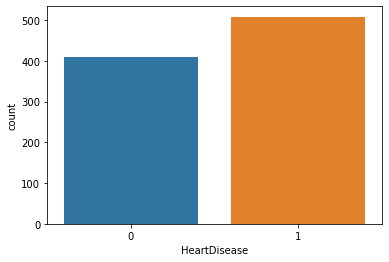

In [8]:
#Target variable - Heart Disease, 0 = No Heart Disease & 1= Heart Disease
print(df['HeartDisease'].value_counts())
sns.countplot(x=df['HeartDisease'])

The above graph displays the people from the dataset who have heart disease, the bar labled 1 and is orange. The bar labeled 0 and is blue are people who do not have heart disease.

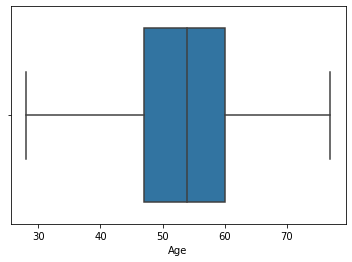

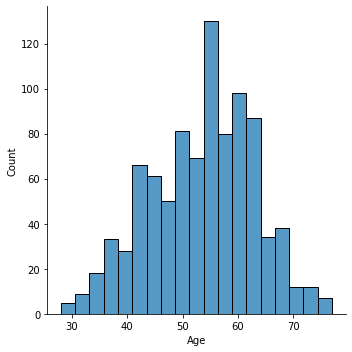

In [9]:
#Graph for age
sns.boxplot(x=df['Age'])
sns.displot(x=df['Age'])

The bottom age graph that is being displayed above shows all the ages of people from the dataset that have heart disease, from this graph you can see the age range that has the most heart disease is between 47-60 which is displayed in the first age graph.

1    725
0    193
Name: Sex, dtype: int64


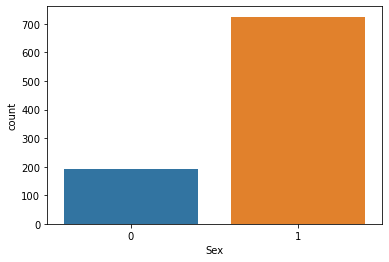

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

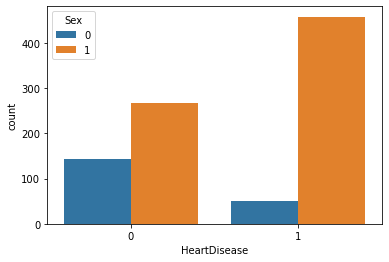

In [10]:
#Graph for gender, 0 = Female & 1 = Male
print(df['Sex'].value_counts())
sns.countplot(x=df['Sex'])
plt.show() 

#Graph to display genders and hearth disease
sns.countplot(data= df, x='HeartDisease',hue='Sex')

From the above graph, Males are more likely to have heart disease than Females

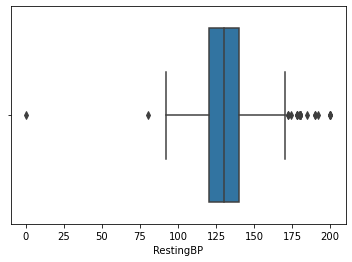

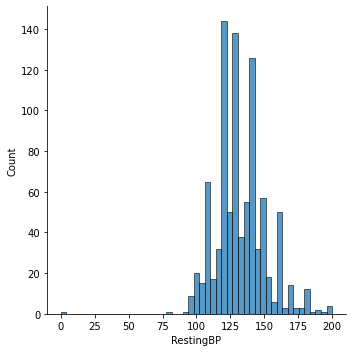

In [11]:
#Graph for RestingBP
sns.boxplot(x=df['RestingBP'])
sns.displot(x=df['RestingBP'])

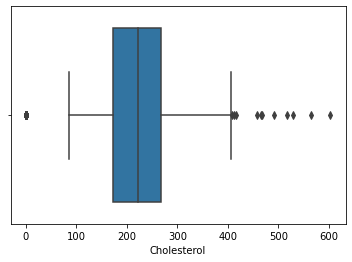

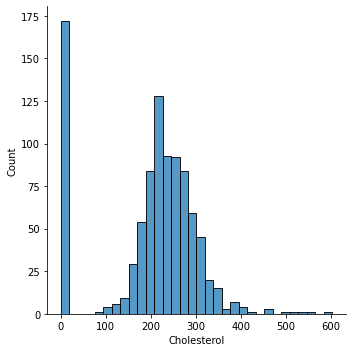

In [12]:
#Graph to show Cholestrol
sns.boxplot(x=df['Cholesterol'])
sns.displot(x=df['Cholesterol'])
plt.show()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64


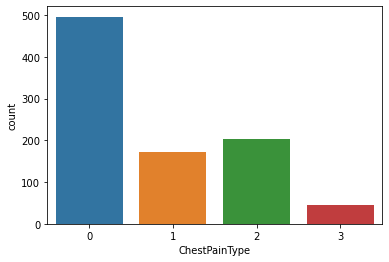

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

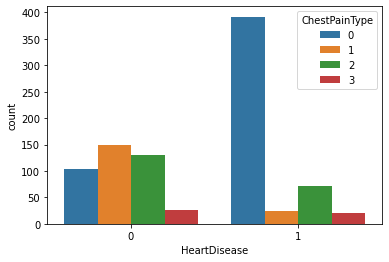

In [13]:
# ChestPainType  # ASY: 0, ATA: 1, NAP: 2, TA: 3
print(df['ChestPainType'].value_counts())
sns.countplot(x=df['ChestPainType'])
plt.show() 

sns.countplot(data= df, x='HeartDisease',hue='ChestPainType')

From the graph, people from the dataset that have the Chestpain ASY have a high chance of heart failure.

0    547
1    371
Name: ExerciseAngina, dtype: int64


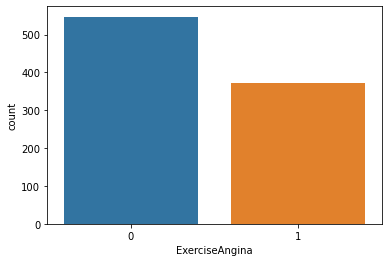

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

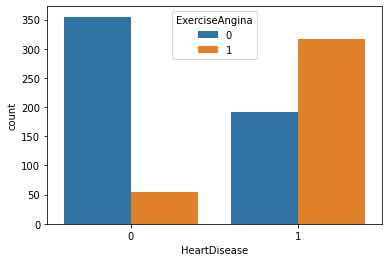

In [14]:
# ExerciseAngina - # N: 0, Y: 1
print(df['ExerciseAngina'].value_counts())
sns.countplot(x=df['ExerciseAngina'])
plt.show() 

sns.countplot(data= df, x='HeartDisease',hue='ExerciseAngina')

The graph above shows a bar chart of people who exercise, from the dataset more than 500 people do not exercise. In the second graph around 350 of people who do exercise do not have heart disease while around 50 do, and from those people who do not exercise more than 300 do have heart disease while around 200 do not.

1    480
2    324
3     82
0     32
Name: AgeGroup, dtype: int64


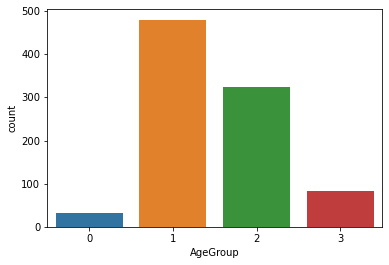

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

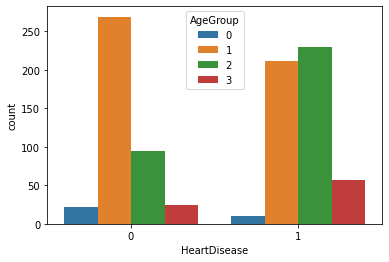

In [15]:
#Bins created ['YoungAdult' : 0,'MiddleAged' : 1,'Aged': 2,'Senior': 3]
df['AgeGroup'] = pd.cut(x=df['Age'],bins=[19,35,55,65,100],labels=[0,1,2,3])

print(df['AgeGroup'].value_counts())
sns.countplot(x=df['AgeGroup'])
plt.show() 

sns.countplot(data= df, x='HeartDisease',hue='AgeGroup')

Middle Aged group people are tend to have more Heart Failures compared to that of people belonging to Senior, Young Adult groups
Age could be one of the imp features to our classification model

4    327
1    291
3    216
2     82
0      1
Name: RestingBP_Binned, dtype: int64


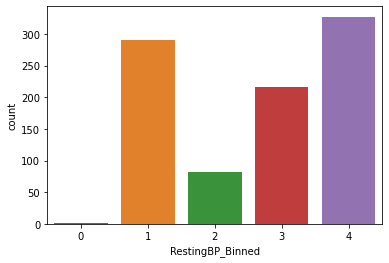

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

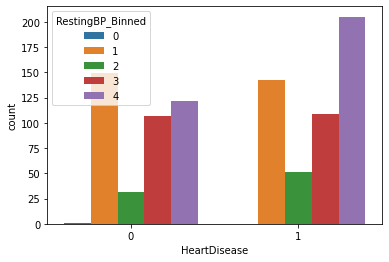

In [16]:
#Bin created  [30,90] - hypotension - 0; [91,120] - Normal -1 ; [121,129] - Elevated- 2; [130-139] - Hypertension - 3 ; [140,200] - Danger -4 !!! 
df = df[df['RestingBP'] != 0]
df['RestingBP_Binned'] = pd.cut(x=df['RestingBP'],bins=[30,90,120,129,139,200],labels=[0,1,2,3,4])

print(df['RestingBP_Binned'].value_counts())
sns.countplot(x=df['RestingBP_Binned'])
plt.show() 

sns.countplot(data= df, x='HeartDisease',hue='RestingBP_Binned')

People with higher resting BP have more of a chance of Heart Failure which is expected.

count    730.000000
mean     241.187671
std       49.735091
min      110.000000
25%      207.000000
50%      236.000000
75%      274.000000
max      394.000000
Name: Cholesterol, dtype: float64


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

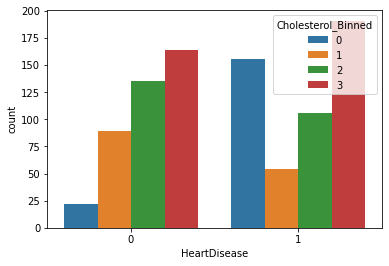

In [17]:
#Bins created  [-1,125] - Very low - 0; [125-200] - Normal -1 [200,239] - borderline - 2 ; [240,700] - high - 3
temp_col = df.loc[(df['Cholesterol'] > 100) & (df['Cholesterol'] < 400)] 
print(temp_col['Cholesterol'].describe())


df['Cholesterol_Binned'] = pd.cut(x=df['Cholesterol'],bins=[-1,125,200,240,700],labels=[0,1,2,3])

sns.countplot(data= df, x='HeartDisease',hue='Cholesterol_Binned') 

Acording to the above graph, very low and high cholesterol level leads to HeartDisease, which does not make sense.

In [18]:
print(df['Cholesterol'].corr(df['HeartDisease']))

#A negative correlation between Cholesterol and Heart Disease is not correct right.
#This checks the records of cholesterol = 0.
temp_data = df[df['Cholesterol'] == 0]
print(temp_data['HeartDisease'].value_counts())

#151/500 heart disease records are shown.
#0 is replaced with the mean value that was calculated earlier.

df['Cholesterol'][df['Cholesterol'] == 0] = 241

-0.23147856637665606
1    151
0     20
Name: HeartDisease, dtype: int64


<ipython-input-18-34e6640f61b8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'][df['Cholesterol'] == 0] = 241


The code and graph below displays the correct Cholesterol and Heart Disease figures. From this newly corrected graph it shows people who have a high cholesterol has heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

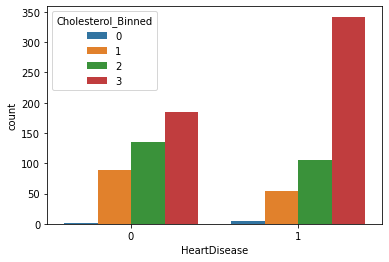

In [19]:
df['Cholesterol_Binned'] = pd.cut(x=df['Cholesterol'],bins=[-1,125,200,240,700],labels=[0,1,2,3])
sns.countplot(data= df, x='HeartDisease',hue='Cholesterol_Binned')

<AxesSubplot:>

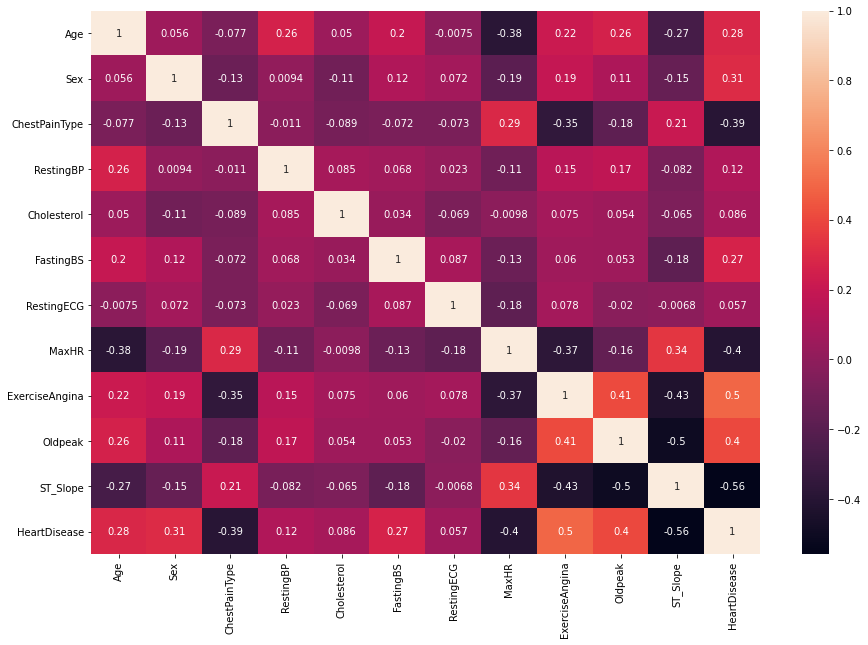

In [20]:
#A correlation heatmeap to display the data of Heart Disease
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Cleaning the data

The code below is used to get the outliers from the dataset. 

In [21]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,0.779716,132.540894,243.957470,0.233370,0.989095,136.789531,0.404580,0.886696,1.36205,0.552890
std,9.437636,0.407864,0.956193,17.999749,53.365934,0.423206,0.632016,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,241.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


Both columns RestingBP and Cholesterol that contain outliers are dropped for the training and testing of the dataset, as both cannot be zero.

In [22]:
df.drop(df.index[df['RestingBP'] == 0], inplace=True)
df.drop(df.index[df['Cholesterol'] == 0], inplace=True)

In [23]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,0.779716,132.540894,243.957470,0.233370,0.989095,136.789531,0.404580,0.886696,1.36205,0.552890
std,9.437636,0.407864,0.956193,17.999749,53.365934,0.423206,0.632016,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,241.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


# Training and Testing the Dataset

HeartDisease is the dependent variable y and x is all other independent variables

In [24]:
y= ['HeartDisease']
x= list(df.columns)
x.remove('HeartDisease')

Used for keeping the train and test data the same with random state so the cell can run multiple times

In [25]:
train_x, test_x, train_y, test_y= train_test_split(df[x], df[y], train_size=0.8, random_state=5)

print(len(train_x),len(test_x))

733 184


In [26]:
test_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,AgeGroup,RestingBP_Binned,Cholesterol_Binned
236,41,1,0,120,336,0,1,118,1,3.0,1,1,1,3
151,48,1,1,100,159,0,1,100,0,0.0,2,1,1,1
329,60,1,0,130,241,1,2,130,1,1.1,0,2,3,3
502,69,1,0,140,208,0,2,140,1,2.0,1,3,4,2
795,42,1,2,120,240,1,1,194,0,0.8,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,39,0,2,138,220,0,1,152,0,0.0,1,1,3,2
40,54,0,1,150,230,0,1,130,0,0.0,2,1,4,2
360,62,1,2,160,241,0,1,72,1,0.0,1,2,4,3
363,56,1,0,120,241,0,2,148,0,0.0,1,2,1,3


# Descriptive Analysis on Data

Displaying summary of the data

In [27]:
train_x.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,53.493861,0.781719,0.739427,132.804911,244.818554,0.223738,0.978172,136.582538,0.406548,0.892087,1.366985
std,9.353502,0.413361,0.937406,18.143745,53.894971,0.417033,0.629045,25.224680,0.491525,1.085796,0.605396
min,29.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,0.000000,130.000000,241.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.000000,0.000000,1.000000,155.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000


In [28]:
test_x.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.570652,0.820652,0.940217,131.489130,240.527174,0.271739,1.032609,137.614130,0.396739,0.865217,1.342391
std,9.791566,0.384690,1.014492,17.422738,51.202580,0.446070,0.643608,26.465526,0.490556,0.990880,0.615951
min,28.000000,0.000000,0.000000,94.000000,113.000000,0.000000,0.000000,63.000000,0.000000,-0.700000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,213.000000,0.000000,1.000000,119.750000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,139.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,254.750000,1.000000,1.000000,158.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,3.000000,180.000000,491.000000,1.000000,2.000000,202.000000,1.000000,3.500000,2.000000


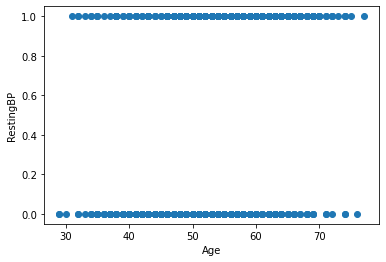

In [29]:
plt.scatter(train_x.Age,train_y.HeartDisease)
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

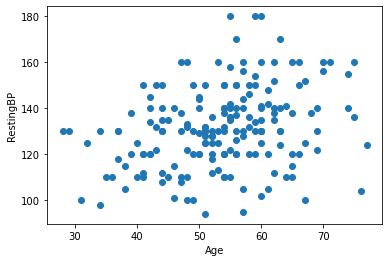

In [30]:
plt.scatter(test_x.Age,test_x.RestingBP)
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.show()

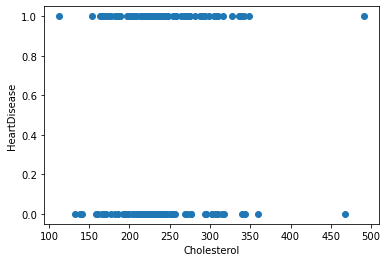

In [31]:
plt.scatter(test_x.Cholesterol,test_y.HeartDisease)
plt.xlabel('Cholesterol')
plt.ylabel('HeartDisease')
plt.show()

# Building Models

## Logistic Regression Model

Logistic Regression Model is a classification algorithm that can predict a categorical dependent variable probability, which is a binary variable of data that is coded as a 1 for yes and 0 for no. As the values for the dataset have been encoded to this way, this model fits the best.

In [32]:
#Creates an object
model= LogisticRegression(solver='liblinear')

In [33]:
#This trains the model
model.fit(train_x,train_y)

C:\Users\murph\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [34]:
predicted= model.predict(test_x)

### Validating and testing the accuracy of the Logistic Regression model

Over-fitting could cause a concern, which is when the models performs well with the training dataset but coould perform badly when it comes to the validation or testing the dataset.

In [35]:
i=0
count=0
for val in test_y['HeartDisease']:
    #print(val)
    if val==predicted[i]:
        count+=1
    i+=1
    
print(round((count*100)/len(test_y),2))

84.78


Rounding the model accuracy score to the nearest 3, meaning the Logistic Regression model is 84.8% accurate

In [36]:
round(model.score(test_x,test_y),3)

0.848

### Logistic Regression Model ROC Curve

ROC stands for Receiver Operating Characteristic, it is a curve that plots the true positive rate against the false positive rate. The tradeoff between sensitivity and specificity is shown.

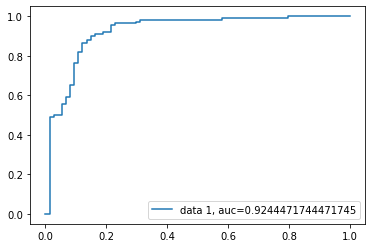

In [37]:
pred_y_proba = model.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, pred_y_proba)
auc = metrics.roc_auc_score(test_y, pred_y_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The AUC score for the graph above is 0.92, an AUC score of 1 represents a perfect classifier while a 0.5 represents a classifier that is worthless. As this one displays an AUC score 0.92 it is a very close to a perfect classifier.

## Decision Tree Classifier Model

In [38]:
model = DecisionTreeClassifier(random_state=213)
model.fit(train_x, train_y) 

pred_y = model.predict(test_x)
print(classification_report(test_y, pred_y))

params = {
    'max_depth': [2, 3, 5, 8, 10],
    'min_samples_leaf': [5, 10, 25, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=1,scoring = "f1")
grid_search.fit(train_x, train_y) 

best_params = grid_search.best_params_
print(best_params)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        74
           1       0.84      0.78      0.81       110

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


In [39]:
best_dt = DecisionTreeClassifier(**best_params,random_state=213)
best_dt.fit(train_x, train_y) 

pred_y = best_dt.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        74
           1       0.95      0.83      0.88       110

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184



### Validating and testing the accuracy of the DecisionTreeClassifier model

Rounding the model accuracy score to the nearest 3, meaning the Decision Tree Classifier model is 78.3% accurate

In [40]:
round(model.score(test_x,test_y),3)

0.783

### Decision Tree Classifier Model ROC Curve 

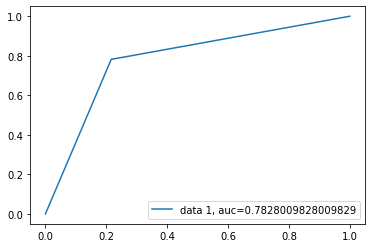

In [41]:
pred_y_proba = model.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, pred_y_proba)
auc = metrics.roc_auc_score(test_y, pred_y_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

As this ROC displays an AUC score 0.78 it close to a perfect classifier.

## RandomForestClassifier Model & Accuracy

RandomForestClassifier Models Accuracy is 85%

In [42]:
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
pred_y = rfc.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        74
           1       0.93      0.89      0.91       110

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



<ipython-input-42-640a738bdcea>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_x, train_y)


### RandomForestClassifier Model ROC Curve 

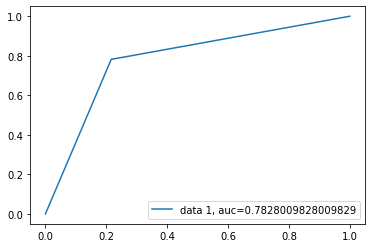

In [43]:
pred_y_proba = model.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, pred_y_proba)
auc = metrics.roc_auc_score(test_y, pred_y_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This ROC curve displays an AUC score 0.78, the same as the previous one. Meaning it too is close to a perfect classifier.

# References

https://www.kaggle.com/gauravduttakiit/heart-failure-prediction-qda-f1

https://www.kaggle.com/gandhalijoshi/xgboost-with-90-accuracy-model

https://www.kaggle.com/devanshanalyzer/heart-failure-prediction-project

https://www.kaggle.com/tbrk16/heart-failure-prediction

https://www.kaggle.com/rakshithanil/heartdiseasedetection-multiplemodels-rfctuning

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python